In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\ANURAG JAISWAL\\OneDrive\\Desktop\\Projects\\Machine Learning\\spam.csv",encoding='windows-1252')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2581,ham,Yup i'm elaborating on the safety aspects and ...,NaN,NaN,NaN
3386,ham,So u workin overtime nigpun?,NaN,NaN,NaN
3081,ham,"And very importantly, all we discuss is betwee...",NaN,NaN,NaN
798,ham,Ok i msg u b4 i leave my house.,NaN,NaN,NaN
5300,ham,I can't make it tonight,NaN,NaN,NaN


## 1.Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Drop last 3 items
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
df.sample(5)

,v1,v2
4578,ham,No plans yet. What are you doing ?
296,ham,Unless it's a situation where YOU GO GURL woul...
3720,ham,Blank is Blank. But wat is blank? Lol
4051,ham,"Ya ok, then had dinner?"
2827,ham,Wife.how she knew the time of murder exactly


In [6]:
#renaming the columns
df.rename(columns={'v1' : 'target', 'v2' : 'text'},inplace=True)
df.sample(5)

,target,text
433,ham,Booked ticket for pongal?
4246,spam,Text PASS to 69669 to collect your polyphonic ...
1508,ham,Sounds like something that someone testing me ...
5316,ham,Jus finish watching tv... U?
1461,ham,Kinda. First one gets in at twelve! Aah. Speak...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [8]:
df["target"]=encoder.fit_transform(df["target"])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [11]:
#Remove Duplicates
df=df.drop_duplicates(keep='first')


In [12]:
df.shape

(5169, 2)

## 2.EDA (Exploratory Data Analysis)

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df["target"].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64>

<function matplotlib.pyplot.show(close=None, block=None)>

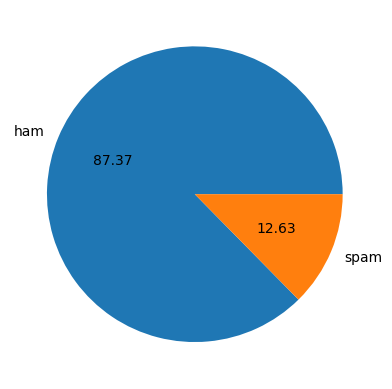

In [15]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show

#Data is imbalanced

In [16]:
import nltk

In [17]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to C:\Users\ANURAG
[nltk_data]     JAISWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
df['num_characters']=df['text'].apply(len) #count no of characetrs in sms

In [19]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x))) #count no of word in sms


In [21]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))# count no of sentences in sms


In [23]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[df['target']==0][["num_characters","num_words","num_sentences"]].describe() #for ham messages charcters

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['target']==1][["num_characters","num_words","num_sentences"]].describe() #for spam messages charcters


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


#As we can see Spam messages are generally bigger than ham

In [26]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

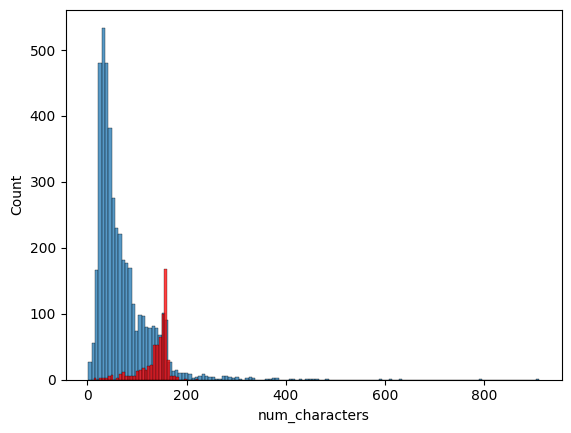

In [27]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

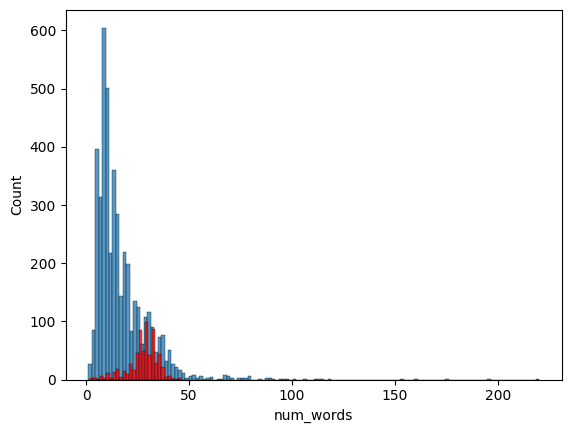

In [28]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

In [29]:
#We can see most of the spam messages have more words and characters in general


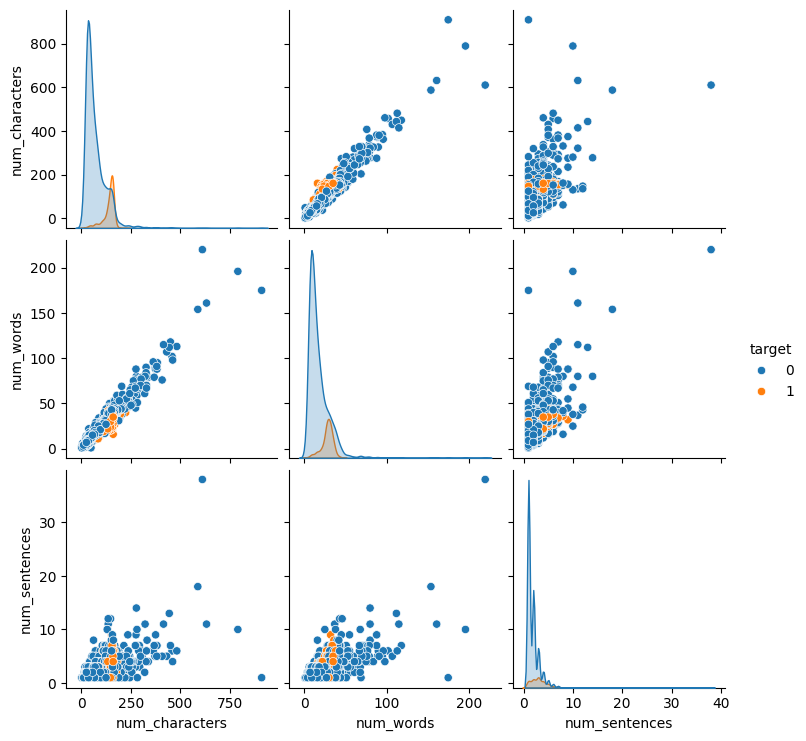

In [30]:
sns.pairplot(df,hue='target')

<Axes: >

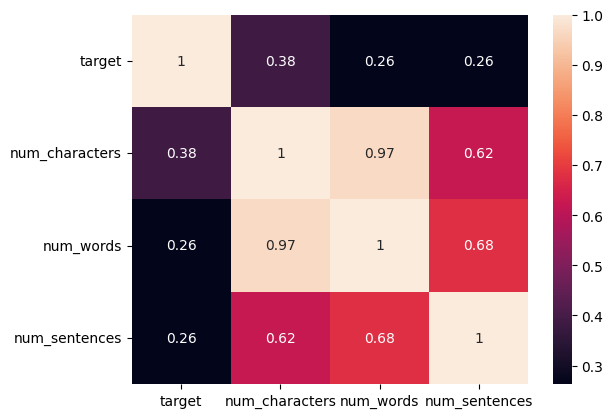

In [31]:
#now making correlation since there are some outliers in our data
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), annot=True) # it will show the probability of spam messages  with respect no num OF charcters words and sentences

In [32]:
#since we can see num of charcters has highest correaltion with spam with probablity of 0.38 we will consider this for our model training

## 3.Data Preprocessing
Lower case
Tokenization
Removing special charcters
Removing stop words and punctuation
Stemming

In [33]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\ANURAG
[nltk_data]     JAISWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [39]:
transform_text("Hi I'm Anurag Jaiswal 19 yr old got 90 % in boards")

'hi anurag jaiswal 19 yr old got 90 board'

In [ ]:
transform_text("Did you like my project on ml?")

In [38]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("Loving")

'love'

In [40]:
transform_text('I loved the YT lectures on ML. How about You?')

'love yt lectur ml'

In [41]:
df["transformed_text"]=df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud

In [44]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [45]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

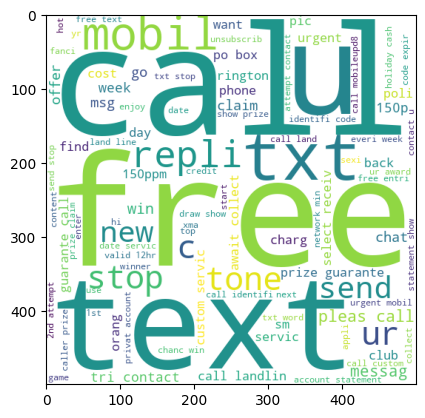

In [46]:
plt.imshow(spam_wc)

In [47]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

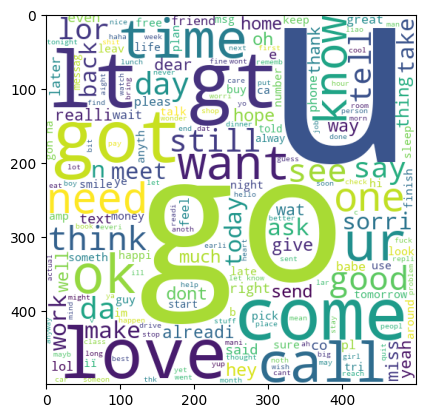

In [48]:
plt.imshow(ham_wc)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
#Finfing the word which is use mostly in Spam messages
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

9939

In [52]:
from collections import Counter


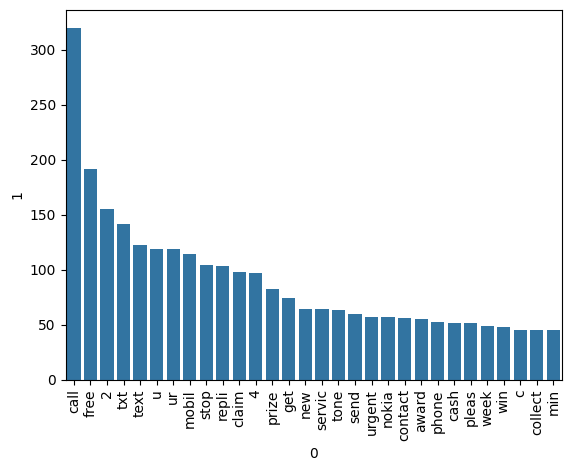

In [53]:
spam_corpus_counter = Counter(spam_corpus).most_common(30)
df_spam = pd.DataFrame(spam_corpus_counter)

sns.barplot(x=df_spam[0], y=df_spam[1])

plt.xticks(rotation="vertical")
plt.show()

In [54]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

35404

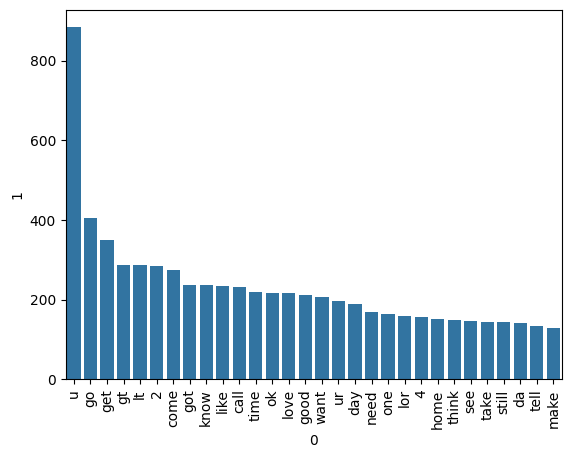

In [56]:
ham_corpus_counter = Counter(ham_corpus).most_common(30)
df_ham = pd.DataFrame(ham_corpus_counter)

sns.barplot(x=df_ham[0], y=df_ham[1])

plt.xticks(rotation="vertical")
plt.show()

## 4. Model Building 


In [77]:
#we will first build naive based model because it is best suitable for text data
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=300) #max_features=300 after doing expreiment for 1000 2000...

In [78]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [79]:
X.shape

(5169, 300)

In [80]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)



In [83]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [84]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [85]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print('For GaussianNB:-')
print("Accuracy Score:",accuracy_score(y_test,y_pred1))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred1))
print("Precision Score:",precision_score(y_test,y_pred1))


For GaussianNB:-
Accuracy Score: 0.6547388781431335
Confusion Matrix: [[546 350]
 [  7 131]]
Precision Score: 0.27234927234927236


In [86]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('For MultinomialNB:-')
print("Accuracy Score:",accuracy_score(y_test,y_pred2))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred2))
print("Precision Score:",precision_score(y_test,y_pred2))

For MultinomialNB:-
Accuracy Score: 0.960348162475822
Confusion Matrix: [[888   8]
 [ 33 105]]
Precision Score: 0.9292035398230089


In [87]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('For BernoulliNB:-')
print("Accuracy Score:",accuracy_score(y_test,y_pred3))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred3))
print("Precision Score:",precision_score(y_test,y_pred3))

For BernoulliNB:-
Accuracy Score: 0.9700193423597679
Confusion Matrix: [[888   8]
 [ 23 115]]
Precision Score: 0.9349593495934959


#Now precision score for MNB is 1 this will be selected for our model
#Data is imbalance so accuracy is less reliable 
#tf-idf has been use because from Count Vectroized precision was less

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [89]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)




In [91]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'ETC': etc,    
}


In [93]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [94]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9593810444874274, 0.9137931034482759)

In [95]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9593810444874274
Precision -  0.9137931034482759
For  KN
Accuracy -  0.9448742746615088
Precision -  0.9655172413793104
For  NB
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  DT
Accuracy -  0.9352030947775629
Precision -  0.865979381443299
For  LR
Accuracy -  0.9622823984526112
Precision -  0.9380530973451328
For  RF
Accuracy -  0.9593810444874274
Precision -  0.8934426229508197
For  ETC
Accuracy -  0.9690522243713733
Precision -  0.9274193548387096


In [97]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [98]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.944874,0.965517
4,LR,0.962282,0.938053
2,NB,0.960348,0.929204
6,ETC,0.969052,0.927419
0,SVC,0.959381,0.913793
5,RF,0.959381,0.893443
3,DT,0.935203,0.865979


In [99]:
#model improve
#1. Change the max_features paramter of Tf-idf
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.944874
1,LR,Accuracy,0.962282
2,NB,Accuracy,0.960348
3,ETC,Accuracy,0.969052
4,SVC,Accuracy,0.959381
5,RF,Accuracy,0.959381
6,DT,Accuracy,0.935203
7,KN,Precision,0.965517
8,LR,Precision,0.938053
9,NB,Precision,0.929204


In [100]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [101]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [102]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [103]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [104]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [105]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.944874,0.965517,0.944874,0.965517,0.944874,0.965517,0.944874,0.965517
1,LR,0.962282,0.938053,0.962282,0.938053,0.962282,0.938053,0.962282,0.938053
2,NB,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
3,ETC,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419
4,SVC,0.959381,0.913793,0.959381,0.913793,0.959381,0.913793,0.959381,0.913793
5,RF,0.959381,0.893443,0.959381,0.893443,0.959381,0.893443,0.959381,0.893443
6,DT,0.935203,0.865979,0.935203,0.865979,0.935203,0.865979,0.935203,0.865979


In [106]:
# Voting Classifier (Combination of algorithms which ultimates perform better)
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [107]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [108]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [109]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9613152804642167
Precision 0.9152542372881356


In [110]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [111]:
from sklearn.ensemble import StackingClassifier

In [112]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [113]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9642166344294004
Precision 0.9173553719008265


In [114]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))